Notebook to look at New NEMO 3.6 Tidal Runs

In [30]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import tidetools
 

In [31]:
# Point Atkinson
PA_1 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/D1/PointAtkinson_0000.nc')
PA_2 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/D2/PointAtkinson_0000.nc')
PA_3 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/D3/PointAtkinson_0000.nc')
old_PA = NC.Dataset('../../myResults/oldtopog/PointAtkinson.nc')

In [32]:
# Port Renfrew
PR_1 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/D1/PortRenfrew_0000.nc')
PR_2 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/D2/PortRenfrew_0000.nc')
PR_3 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/D3/PortRenfrew_0000.nc')
old_PR = NC.Dataset('../../myResults/oldtopog/PortRenfrew.nc')

In [33]:
# Check Dimensions
nc_tools.show_dimensions(PA_1)
nc_tools.show_dimensions(PA_2)
nc_tools.show_dimensions(PA_3)

<type 'netCDF4.Dimension'>: name = 'x', size = 1

<type 'netCDF4.Dimension'>: name = 'y', size = 1

<type 'netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 48

<type 'netCDF4.Dimension'>: name = 'time_bounds', size = 2

<type 'netCDF4.Dimension'>: name = 'x', size = 1

<type 'netCDF4.Dimension'>: name = 'y', size = 1

<type 'netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 47

<type 'netCDF4.Dimension'>: name = 'time_bounds', size = 2

<type 'netCDF4.Dimension'>: name = 'x', size = 1

<type 'netCDF4.Dimension'>: name = 'y', size = 1

<type 'netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 96

<type 'netCDF4.Dimension'>: name = 'time_bounds', size = 2



In [34]:
# Check Variables
nc_tools.show_variables(PA_1)

[u'nav_lat', u'nav_lon', u'sossheig', u'time_centered', u'time_centered_bounds', u'time_counter', u'time_counter_bounds']


# Point Atkinson

In [35]:
SSH = PA_1.variables['sossheig'][:]
SSH = np.append(SSH, PA_2.variables['sossheig'][:])
SSH = np.append(SSH, PA_3.variables['sossheig'][:])
print SSH.shape
oldSSH = old_PA.variables['sossheig'][:]
print oldSSH.shape

(191,)
(3840, 1, 1)


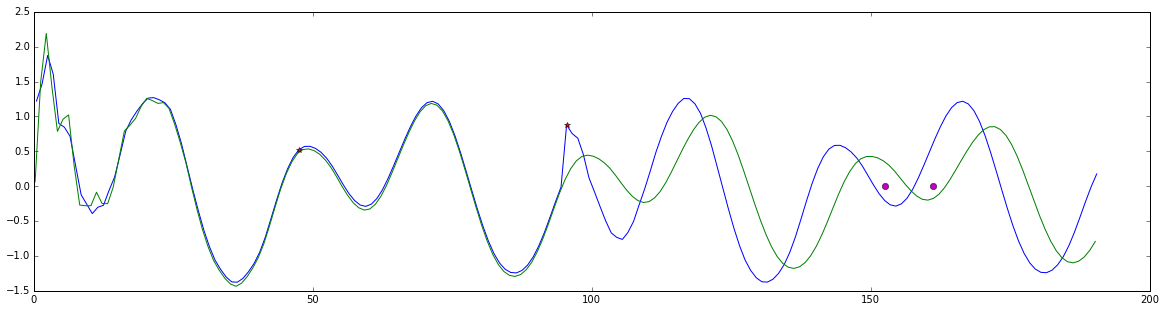

In [40]:
length = SSH.shape[0]
plt.figure(figsize=(20,5))
plt.plot(np.arange(0.5,length,1),SSH)
plt.plot(np.arange(0.25,length,1),oldSSH[:length*2:2,0,0])
plt.plot(48-0.5,SSH[47],'r*')
plt.plot(96-0.5,SSH[95],'r*')
plt.plot(7252*40./1800.,0,'mo')
plt.plot(6869*40./1800.,0,'mo')

Starts off fine, for first section (to first red star), then things start going weird.  Look closer to the boundary.

# Port Renfrew

In [37]:
SSH = PR_1.variables['sossheig'][:]
SSH = np.append(SSH, PR_2.variables['sossheig'][:])
SSH = np.append(SSH, PR_3.variables['sossheig'][:])
print SSH.shape
oldSSH = old_PR.variables['sossheig'][:]
print oldSSH.shape

(191,)
(3840, 1, 1)


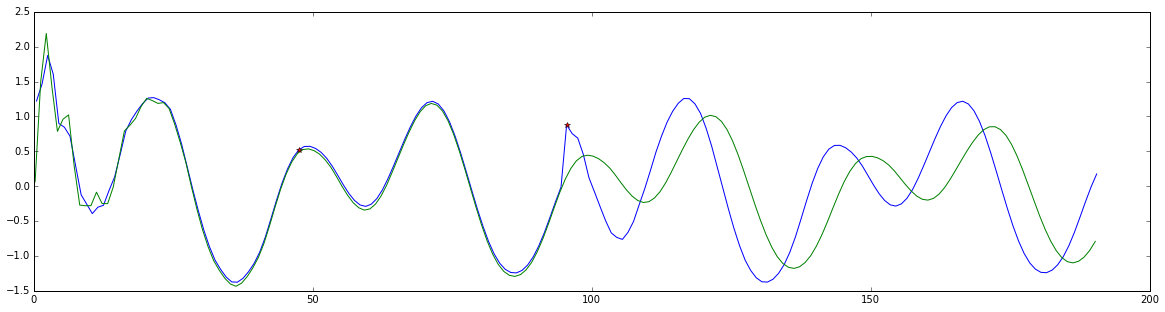

In [38]:
length = SSH.shape[0]
plt.figure(figsize=(20,5))
plt.plot(np.arange(0.5,length,1),SSH)
plt.plot(np.arange(0.25,length,1),oldSSH[:length*2:2,0,0])
plt.plot(48-0.5,SSH[47],'r*')
plt.plot(96-0.5,SSH[95],'r*')

Oh no!  The tidal boundary conditions are not correct on restart!